### Depencencias y Rutas

In [ ]:
# Instalación de Ultralytics YOLOv8 y OpenCV
# Ejecutar solo la primera vez en el entorno local

#pip install ultralytics opencv-python

In [1]:
# Importación de librerías necesarias

from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image
import os

%matplotlib inline

In [2]:
# Ruta al archivo data.yaml (ajustar según corresponda)
DATA_YAML_PATH = './data.yaml'

# Ruta donde se almacenarán los resultados de entrenamiento, como logs y pesos generados
PROJECT_PATH = './yolov8_vehicle'

## **Modelo YOLOv8**

### Cargar Modelo

In [3]:
# Cargar el modelo YOLOv8 preentrenado.
# Puedes usar modelos como yolov8n.pt (nano), yolov8s.pt (small), yolov8m.pt, etc.

model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:02<00:00, 11.2MB/s]


### Entrenamiento

Configura los parámetros de entrenamiento: epochs, tamaño de imagen, batch, nombre y proyecto.

In [4]:
# ENTRENAMIENTO DEL MODELO

# Parámetros de entrenamiento:

model.train(
    data="data.yaml",
    epochs=100,                # suficiente para converger sin overfitting
    imgsz=640,                 # estándar
    batch=16,                  # ajusta a VRAM disponible (puedes probar 24)
    optimizer="AdamW",         # más estable que SGD para datasets variados
    lr0=0.001,                  # learning rate base
    weight_decay=0.0005,        # regularización
    patience=20,               # early stopping
    name='vehicle_type_gpu',
    project=PROJECT_PATH,
    device=0
)

New https://pypi.org/project/ultralytics/8.3.179 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.161  Python-3.11.9 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=vehicle_type_gpu, nbs=64, nms=False, opset=None, optim

train: Scanning E:\Descargas\Proyecto YOLO Vehicle\dataset\train\labels.cache... 2704 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2704/2704 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 3.62.1 MB/s, size: 45.9 KB)


val: Scanning E:\Descargas\Proyecto YOLO Vehicle\dataset\valid\labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]

val: E:\Descargas\Proyecto YOLO Vehicle\dataset\valid\images\Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: E:\Descargas\Proyecto YOLO Vehicle\dataset\valid\images\Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed


Plotting labels to yolov8_vehicle\vehicle_type_gpu\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolov8_vehicle\vehicle_type_gpu
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.34G      1.447      2.043      1.195        265        640: 100%|██████████| 169/169 [25:48<00:00,  9.16s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


                   all        300       2568      0.455      0.227      0.222       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.86G        1.4      1.657      1.191        269        640: 100%|██████████| 169/169 [06:52<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        300       2568      0.496       0.29      0.274      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.17G      1.419      1.584        1.2        193        640: 100%|██████████| 169/169 [20:15<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


                   all        300       2568      0.571      0.256      0.266      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.61G      1.397      1.512      1.194        131        640: 100%|██████████| 169/169 [08:08<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


                   all        300       2568      0.525      0.275      0.284      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.67G      1.374      1.448      1.178        176        640: 100%|██████████| 169/169 [07:34<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]

                   all        300       2568      0.568      0.307      0.305      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.83G      1.344      1.366      1.157        240        640: 100%|██████████| 169/169 [07:13<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


                   all        300       2568      0.501      0.352      0.346        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.65G       1.32      1.324      1.145        196        640: 100%|██████████| 169/169 [08:09<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.74it/s]

                   all        300       2568      0.655      0.365      0.371      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.11G      1.312      1.316      1.145        190        640: 100%|██████████| 169/169 [06:40<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]


                   all        300       2568      0.576      0.401      0.386      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.92G      1.299      1.269      1.133        269        640: 100%|██████████| 169/169 [29:11<00:00, 10.36s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


                   all        300       2568      0.507      0.387      0.354      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.17G      1.285      1.242      1.131        280        640: 100%|██████████| 169/169 [07:11<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

                   all        300       2568       0.52      0.381      0.369      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.13G      1.265      1.191      1.115        175        640: 100%|██████████| 169/169 [08:29<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


                   all        300       2568      0.539      0.328      0.376      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.81G      1.262      1.197      1.116        190        640: 100%|██████████| 169/169 [08:22<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]


                   all        300       2568      0.536      0.365      0.363      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.72G      1.238      1.136      1.104        218        640: 100%|██████████| 169/169 [05:34<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        300       2568      0.565      0.344      0.381      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.97G      1.236      1.128      1.097        123        640: 100%|██████████| 169/169 [05:29<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]

                   all        300       2568      0.597      0.419      0.397      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.57G       1.23       1.13      1.094        130        640: 100%|██████████| 169/169 [06:01<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        300       2568      0.558      0.416      0.423      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.91G      1.203       1.09      1.084        149        640: 100%|██████████| 169/169 [07:46<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]

                   all        300       2568      0.529      0.429      0.389       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.92G      1.216      1.074      1.086        329        640: 100%|██████████| 169/169 [05:35<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


                   all        300       2568      0.633      0.399      0.405      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.61G      1.196       1.05      1.083        322        640: 100%|██████████| 169/169 [06:05<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.33it/s]

                   all        300       2568      0.566      0.395      0.405      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.97G      1.201      1.049      1.079        129        640: 100%|██████████| 169/169 [08:46<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        300       2568      0.504      0.404      0.409      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.85G      1.189      1.025      1.074        214        640: 100%|██████████| 169/169 [06:32<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.55it/s]

                   all        300       2568      0.678      0.395      0.448      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.03G      1.163     0.9961      1.065        217        640: 100%|██████████| 169/169 [06:36<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.81it/s]

                   all        300       2568      0.549      0.445      0.414      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.71G      1.157      0.997      1.061        288        640: 100%|██████████| 169/169 [06:17<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        300       2568      0.468      0.505      0.442      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.94G      1.168     0.9751      1.061        228        640: 100%|██████████| 169/169 [06:48<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        300       2568      0.551      0.426      0.479      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.15G      1.153     0.9666      1.056        300        640: 100%|██████████| 169/169 [06:55<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


                   all        300       2568      0.614      0.379      0.408      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.83G      1.132     0.9461      1.046        136        640: 100%|██████████| 169/169 [06:03<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]

                   all        300       2568      0.624      0.408      0.426      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.84G      1.151     0.9495      1.051        291        640: 100%|██████████| 169/169 [06:13<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.50it/s]


                   all        300       2568      0.586       0.43      0.437      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.77G      1.134     0.9156      1.044        174        640: 100%|██████████| 169/169 [06:57<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]

                   all        300       2568      0.585      0.386      0.414       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.13G      1.126     0.9168       1.04        221        640: 100%|██████████| 169/169 [07:02<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]

                   all        300       2568      0.578      0.436      0.448      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.61G       1.13     0.9148      1.042        237        640: 100%|██████████| 169/169 [06:10<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]

                   all        300       2568      0.564      0.438       0.44       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       6.8G      1.113     0.8824      1.035        273        640: 100%|██████████| 169/169 [05:01<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]

                   all        300       2568      0.644      0.423      0.492       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.68G      1.099     0.8766      1.028        156        640: 100%|██████████| 169/169 [05:58<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]

                   all        300       2568      0.642      0.381       0.42      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.77G      1.094     0.8689      1.029        171        640: 100%|██████████| 169/169 [06:03<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]

                   all        300       2568      0.536      0.482      0.477       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.63G      1.102     0.8689      1.027        262        640: 100%|██████████| 169/169 [06:56<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        300       2568      0.634      0.372      0.447      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.98G      1.091     0.8446      1.023        232        640: 100%|██████████| 169/169 [08:01<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        300       2568      0.642       0.43      0.451      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.91G      1.068      0.818      1.014        393        640: 100%|██████████| 169/169 [10:09<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]


                   all        300       2568      0.656      0.414      0.437      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.76G      1.062     0.8183      1.014        189        640: 100%|██████████| 169/169 [07:34<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]

                   all        300       2568      0.538      0.491      0.501      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.93G      1.074     0.8178      1.012        170        640: 100%|██████████| 169/169 [07:25<00:00,  2.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.78it/s]


                   all        300       2568      0.619      0.456      0.496      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.86G      1.067     0.8066      1.009        242        640: 100%|██████████| 169/169 [08:32<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        300       2568      0.613      0.413      0.449      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.68G      1.055     0.7992       1.01        301        640: 100%|██████████| 169/169 [07:09<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


                   all        300       2568      0.605      0.393      0.502      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.96G      1.063     0.7876      1.001        281        640: 100%|██████████| 169/169 [07:10<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]

                   all        300       2568      0.646      0.407      0.501      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.88G      1.043     0.7778      1.003        280        640: 100%|██████████| 169/169 [06:22<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.74it/s]

                   all        300       2568      0.655      0.381      0.451      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.81G      1.047      0.772      0.998        229        640: 100%|██████████| 169/169 [07:24<00:00,  2.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]

                   all        300       2568      0.529      0.468      0.503      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.64G      1.038      0.767     0.9964        235        640: 100%|██████████| 169/169 [07:38<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

                   all        300       2568      0.617      0.415      0.463      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.97G      1.036     0.7607     0.9968        163        640: 100%|██████████| 169/169 [07:12<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.63it/s]

                   all        300       2568      0.553      0.399      0.442      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.11G      1.041     0.7538     0.9974        290        640: 100%|██████████| 169/169 [08:07<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.76it/s]

                   all        300       2568      0.554      0.485      0.478      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.64G      1.024     0.7428     0.9908        207        640: 100%|██████████| 169/169 [06:03<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


                   all        300       2568      0.519      0.484       0.48      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.67G      1.005     0.7266     0.9868        169        640: 100%|██████████| 169/169 [07:21<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.67it/s]

                   all        300       2568      0.514       0.48      0.499      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.86G      1.012     0.7276     0.9852        185        640: 100%|██████████| 169/169 [08:30<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]

                   all        300       2568      0.686      0.469       0.51      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.89G      1.004     0.7166     0.9808        194        640: 100%|██████████| 169/169 [09:12<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.79it/s]

                   all        300       2568      0.597      0.464       0.52      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.77G      1.001     0.7067     0.9779        173        640: 100%|██████████| 169/169 [07:51<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


                   all        300       2568      0.562      0.478      0.458      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.85G      1.006     0.7095      0.981        227        640: 100%|██████████| 169/169 [25:27<00:00,  9.04s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        300       2568      0.601      0.449        0.5      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.62G     0.9847     0.6954     0.9719        173        640: 100%|██████████| 169/169 [08:30<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        300       2568      0.557      0.503      0.515      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.21G     0.9859     0.6925     0.9735        499        640: 100%|██████████| 169/169 [08:27<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

                   all        300       2568      0.556      0.463      0.487      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       6.9G     0.9817     0.6841     0.9735        463        640: 100%|██████████| 169/169 [04:36<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

                   all        300       2568      0.532      0.478      0.484      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       6.8G      0.967     0.6853     0.9705        197        640: 100%|██████████| 169/169 [05:35<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]

                   all        300       2568      0.576      0.481      0.503      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.85G     0.9722      0.672     0.9675        286        640: 100%|██████████| 169/169 [07:12<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


                   all        300       2568      0.617      0.456      0.475      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.71G     0.9619      0.663     0.9694        172        640: 100%|██████████| 169/169 [07:42<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]

                   all        300       2568      0.601      0.475      0.496      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.26G     0.9553     0.6553     0.9663        156        640: 100%|██████████| 169/169 [06:11<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        300       2568      0.533      0.457      0.461      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.99G      0.953     0.6547     0.9621        260        640: 100%|██████████| 169/169 [07:20<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        300       2568      0.523      0.472      0.491      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.65G     0.9569      0.654     0.9626        224        640: 100%|██████████| 169/169 [04:30<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        300       2568      0.519      0.476      0.513      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.44G     0.9484     0.6428     0.9589        224        640: 100%|██████████| 169/169 [06:27<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

                   all        300       2568      0.603      0.481      0.499      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.98G     0.9507     0.6428     0.9585        294        640: 100%|██████████| 169/169 [08:09<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]

                   all        300       2568      0.615      0.464      0.506      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.29G     0.9411     0.6405     0.9558        144        640: 100%|██████████| 169/169 [05:55<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]

                   all        300       2568      0.602      0.457      0.491      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.66G     0.9334     0.6321     0.9535        212        640: 100%|██████████| 169/169 [06:18<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


                   all        300       2568      0.646      0.457      0.499      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.61G     0.9276     0.6192     0.9529        187        640: 100%|██████████| 169/169 [05:31<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        300       2568      0.697      0.429      0.492      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.54G      0.926     0.6209     0.9506        288        640: 100%|██████████| 169/169 [05:33<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

                   all        300       2568      0.697       0.43      0.491      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.39G     0.9194     0.6081     0.9465        205        640: 100%|██████████| 169/169 [08:03<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        300       2568      0.543      0.495      0.506      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.92G     0.9101     0.6074     0.9455        160        640: 100%|██████████| 169/169 [09:11<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]

                   all        300       2568      0.505      0.481      0.506      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.93G     0.9165     0.6085     0.9476        212        640: 100%|██████████| 169/169 [06:06<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        300       2568       0.54      0.452      0.488      0.283


EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 49, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

69 epochs completed in 9.419 hours.
Optimizer stripped from yolov8_vehicle\vehicle_type_gpu\weights\last.pt, 22.5MB
Optimizer stripped from yolov8_vehicle\vehicle_type_gpu\weights\best.pt, 22.5MB

Validating yolov8_vehicle\vehicle_type_gpu\weights\best.pt...
Ultralytics 8.3.161  Python-3.11.9 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


                   all        300       2568      0.597      0.464       0.52      0.307
               bicycle         30         32        0.6      0.422      0.462      0.187
                   bus        220        425      0.858      0.512      0.697      0.445
                   car        232        842      0.819      0.716        0.8      0.545
               minibus          2          2      0.229        0.5      0.495      0.396
               minivan         87        110      0.504      0.373       0.39      0.288
             motorbike        166        335      0.684      0.543      0.551      0.191
                pickup        105        142      0.563        0.2      0.343      0.195
             policecar          1          1          1          0      0.332      0.232
              rickshaw         62        192      0.783      0.682      0.726       0.47
               scooter          1          1      0.727          1      0.995      0.298
                   su

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E3D3862C10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.04

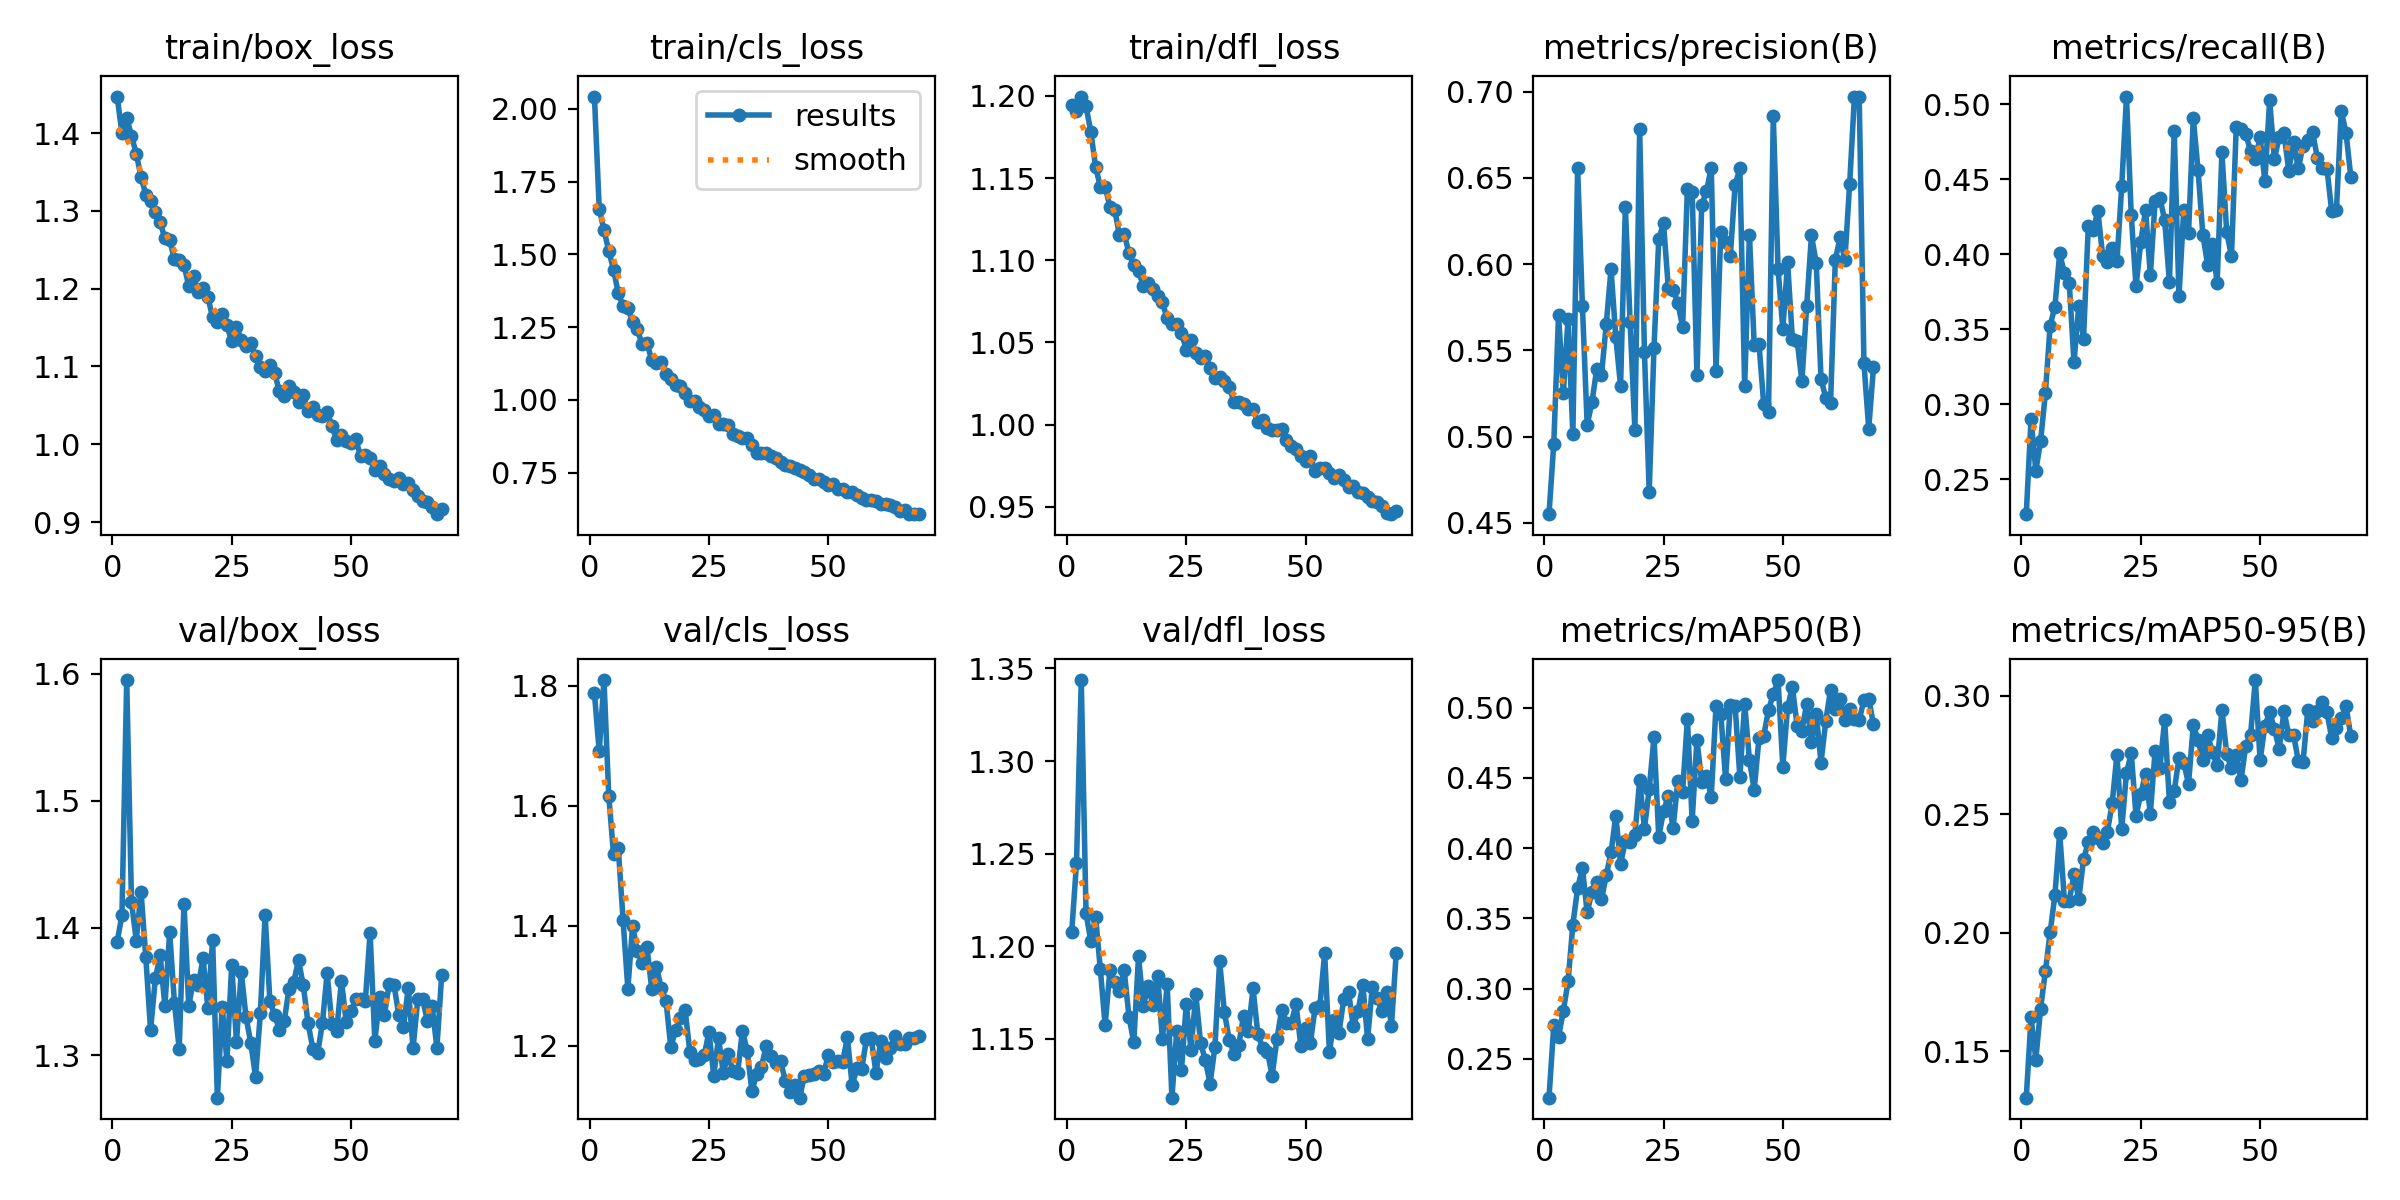

In [5]:
# Visualizar los resultados del entrenamiento (gráficas de pérdida y métricas)

Image(filename=f'{PROJECT_PATH}/vehicle_type_gpu/results.png')

### Evaluación del modelo

In [6]:
# Evaluación del modelo en el conjunto de validación

metrics = model.val()
print(metrics)  # Muestra métricas como precisión, recall, mAP, etc.

Ultralytics 8.3.161  Python-3.11.9 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 398.4132.9 MB/s, size: 35.2 KB)


val: Scanning E:\Descargas\Proyecto YOLO Vehicle\dataset\valid\labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]

val: E:\Descargas\Proyecto YOLO Vehicle\dataset\valid\images\Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: E:\Descargas\Proyecto YOLO Vehicle\dataset\valid\images\Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.91it/s]


                   all        300       2568      0.597      0.464       0.52      0.307
               bicycle         30         32        0.6      0.422      0.462      0.187
                   bus        220        425      0.858      0.512      0.697      0.445
                   car        232        842      0.819      0.716        0.8      0.545
               minibus          2          2      0.229        0.5      0.495      0.396
               minivan         87        110      0.504      0.373       0.39      0.288
             motorbike        166        335      0.684      0.543      0.551      0.191
                pickup        105        142      0.563        0.2      0.343      0.195
             policecar          1          1          1          0      0.332      0.232
              rickshaw         62        192      0.783      0.682      0.726       0.47
               scooter          1          1      0.727          1      0.995      0.298
                   su

### Inferencias

Realizar predicciones sobre imágenes de carpeta test_images.

In [7]:
# Inferir sobre imágenes de prueba ubicadas en la carpeta ./test_images
# Las predicciones se guardarán en PROJECT_PATH/predictions

results = model.predict(
    source='./test_images/',  # Ruta a las imágenes de prueba
    conf=0.5,                 # Umbral de confianza para mostrar detecciones
    save=True,                # Guarda las imágenes con las detecciones
    project=PROJECT_PATH,     # Ruta base donde guardar resultados
    name='predictions'        # Subcarpeta dentro de project
)


image 1/47 e:\Descargas\Proyecto YOLO Vehicle\test_images\01.jpg: 640x448 4 buss, 14 cars, 2 minibuss, 1 minivan, 1 pickup, 47.6ms
image 2/47 e:\Descargas\Proyecto YOLO Vehicle\test_images\02.jpg: 384x640 31 cars, 2 pickups, 18 suvs, 1 van, 46.2ms
image 3/47 e:\Descargas\Proyecto YOLO Vehicle\test_images\03.jpg: 384x640 3 cars, 1 minivan, 30.7ms
image 4/47 e:\Descargas\Proyecto YOLO Vehicle\test_images\04.jpg: 480x640 3 buss, 21 cars, 2 minibuss, 1 minivan, 6 pickups, 1 three wheelers -CNG-, 2 vans, 43.6ms
image 5/47 e:\Descargas\Proyecto YOLO Vehicle\test_images\05.jpg: 384x640 1 bus, 27 cars, 1 minibus, 1 minivan, 1 pickup, 3 suvs, 32.9ms
image 6/47 e:\Descargas\Proyecto YOLO Vehicle\test_images\06.jpg: 384x640 3 buss, 28 cars, 1 motorbike, 30.1ms
image 7/47 e:\Descargas\Proyecto YOLO Vehicle\test_images\07.jpg: 352x640 37 cars, 6 suvs, 2 vans, 38.9ms
image 8/47 e:\Descargas\Proyecto YOLO Vehicle\test_images\08.jpg: 384x640 2 buss, 13 cars, 4 minivans, 2 pickups, 1 van, 25.9ms
image

---

### Inferencias con visualización personalizada

Este bloque define una función reutilizable para realizar inferencias sobre un conjunto de imágenes, dibujando las cajas con colores específicos según la clase:
- Azul para cables en buen estado
- Rojo para cables en mal estado

Además, las imágenes resultantes se guardan con las anotaciones en la carpeta indicada.

In [ ]:
# Colores personalizados por clase (BGR)
COLORS = {
    0: (255, 0, 0),   # Azul para buen estado
    1: (0, 0, 255)    # Rojo para mal estado
}

# Etiquetas en español
LABELS_ES = {
    0: "Buen estado",
    1: "Mal estado"
}

def draw_label(img, text, pos, bg_color, font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=0.6, text_color=(255, 255, 255)):
    """Dibuja una etiqueta con fondo de color sobre la imagen"""
    text_size, _ = cv2.getTextSize(text, font, font_scale, 1)
    text_w, text_h = text_size
    x, y = pos
    cv2.rectangle(img, (x, y - text_h - 6), (x + text_w + 4, y), bg_color, -1)
    cv2.putText(img, text, (x + 2, y - 2), font, font_scale, text_color, 1, cv2.LINE_AA)

def infer_and_save(
    model_path: str,
    source_dir: str,
    output_dir: str,
    conf_threshold: float = 0.3
):
    """
    Realiza inferencia sobre una carpeta de imágenes, dibuja los resultados con colores personalizados
    y guarda las imágenes anotadas.

    Parámetros:
    - model_path: ruta al modelo .pt
    - source_dir: carpeta con imágenes a procesar
    - output_dir: carpeta donde guardar las predicciones
    - conf_threshold: umbral de confianza para mostrar resultados
    """
    # Crear carpeta de salida si no existe
    os.makedirs(output_dir, exist_ok=True)

    # Cargar el modelo
    model = YOLO(model_path)

    # Realizar inferencias
    results = model.predict(source=source_dir, conf=conf_threshold, save=False)

    # Procesar resultados
    for result in results:
        img = result.orig_img.copy()
        boxes = result.boxes

        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0])
            conf = float(box.conf[0])

            color = COLORS.get(cls, (255, 255, 255))
            label_text = f'{LABELS_ES.get(cls, "Clase desconocida")} {conf:.2f}'

            # Dibujar bounding box y etiqueta
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            draw_label(img, label_text, (x1, y1), bg_color=color)

        # Guardar imagen anotada
        img_name = os.path.basename(result.path)
        cv2.imwrite(os.path.join(output_dir, img_name), img)

    print(f"Inferencias completadas. Resultados guardados en: {output_dir}")


#### ¿Cómo usarlo?

```python
infer_and_save(
    model_path='best3.pt',
    source_dir='./test-cableadoDesuso/',
    output_dir='./yolov8_cable/predictions_cableadoDesuso_colored',
    conf_threshold=0.3
)
```

In [ ]:
infer_and_save(
    model_path='best.pt',
    source_dir='./test_images/',
    output_dir='./yolov8_cable/predictions_colored',
    conf_threshold=0.3
)

---

### Inferencias sobre un video

In [ ]:
# Realizar inferencia sobre un video
results = model.predict(
    source='./test_videos/',  # Reemplaza con la ruta real del video
    conf=0.3,                      # Umbral de confianza
    save=True,                     # Guarda el video con las detecciones
    project=PROJECT_PATH,          # Carpeta donde se guardarán los resultados
    name='video_inferencias',      # Subcarpeta
    save_txt=False                 # Puedes activar si quieres guardar detecciones en formato .txt
)